## 7. Exploring and Reporting
### 7.1 
Move the clusters around and change their sizes to make it easier or
 harder for the classifier to find a decent boundary. Pay attention
 to when the optimizer (minimize function) is not able to find a
 solution at all

In [1]:
from IPython.display import Image, display

Here is the output when std = 0.2, C = None, using linear kernel function

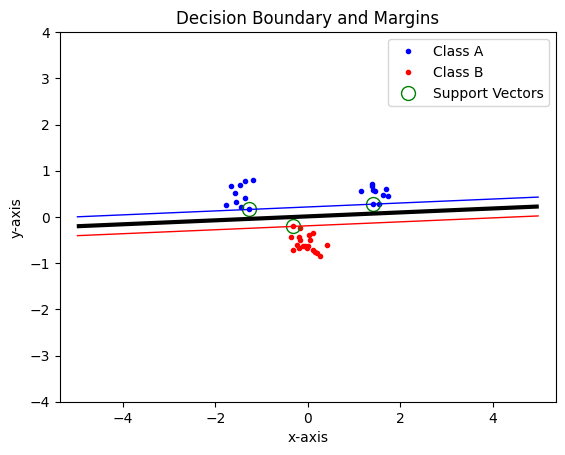

In [2]:
display(Image('src/7_1_linear_origin.png'))

Here is the output when std = 0.3, C = None, using linear kernel function, which is the edge case where the linear kernel could find the hard boundary without slack.


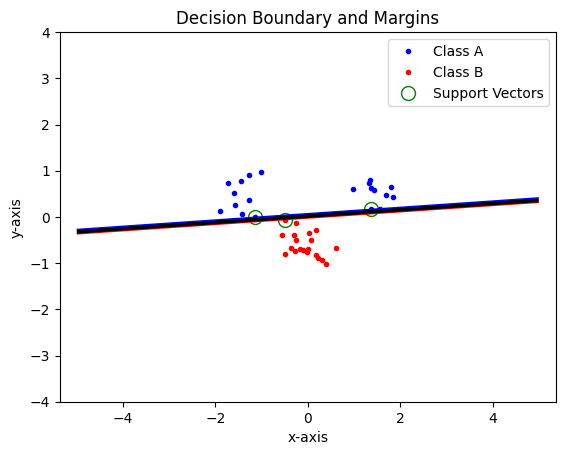

In [3]:
display(Image('src/7_1_linear_0.3.png'))

Increasing std = 0.4, we can see that the optimizer can not find the solution. The error message is attached as follows:
```python
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[124], line 8
      6 # The string 'success' instead holds a boolean representing if the optimizer has found a solution
      7 if (not success): 
----> 8     raise ValueError(f'Cannot find optimizing solution when std is {std} and C is {C}')
      9 print(f"Optimization successful: {success} when std is {std} and C is {C}")

ValueError: Cannot find optimizing solution when std is 0.4 and C is None
```
Let 'C = 0.1', we get the following result:

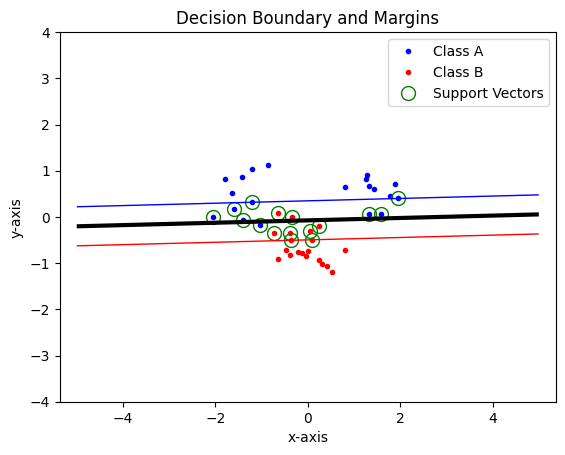

In [4]:
display(Image('src/7_1_linear_0.4_C_0.1.png'))

We changed the parameters when generating the data, here are examples when we tried to change the center and size of data sets.

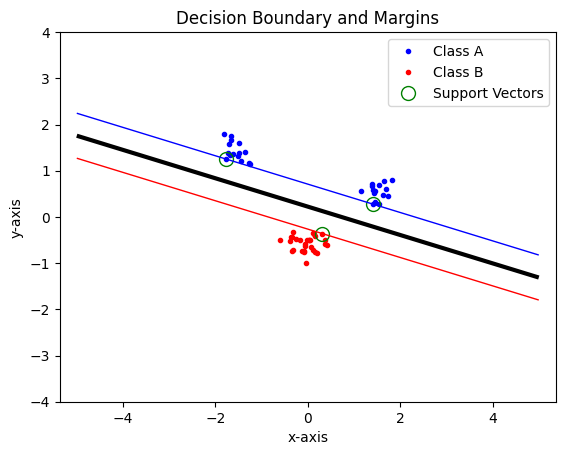

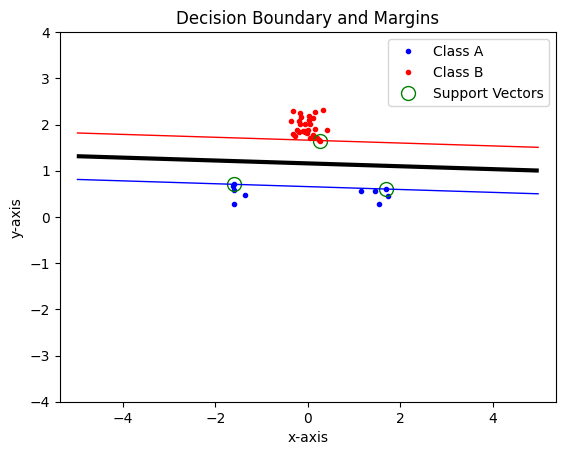

In [5]:
display(Image('src/7_1_linear_change_size_move_centerA.png'))
display(Image('src/7_1_linear_change_size_move_centerB.png'))

### 7.2
Implement the two non-linear kernels. You should be able to clas
sify very hard data sets with these.
```python
def poly_kernel(x, y, p=2):
    return (np.dot(x, y) + 1.0)**p

def rbf_kernel(x, y, sigma=3):
    # The parameter is used to control the smoothness of the boundary
    diff = x - y
    return np.exp(-np.dot(diff, diff) / (2*sigma**2))
```
  - Using the original datasets, we will display the results together in 7.3.
### 7.3
The non-linear kernels have parameters; explore how they influence the decision boundary. Reason about this in terms of the bias variance trade-off.
- Low Complexity (High Bias, Low Variance): a low degree p in the polynomial kernel, and a large σ in the RBF kernel

  - This occurs when non-linear kernel parameters are set to make the boundary smoother.
  - The model is relatively simple (high bias), potentially underfitting the training data, but it generalizes well to new data (low variance).

- High Complexity (Low Bias, High Variance): a high degree p in the polynomial kernel, and a small σ in the RBF kernel 

    - This occurs when the parameters allow the boundary to become very complex and curvy.
    - The model fits the training data better (low bias), but it becomes overly specialized to the training data, leading to overfitting / poor generalization on new data (high variance).
- We will set Slack parameter C as none, and the results are as follows:
#### 7.3.1 Poly kernel
  - High p: complex decision boundary -> overfitting -> high variance & low bias
  - Low p: smooth decision boundary -> underfitting -> low variance & high bias


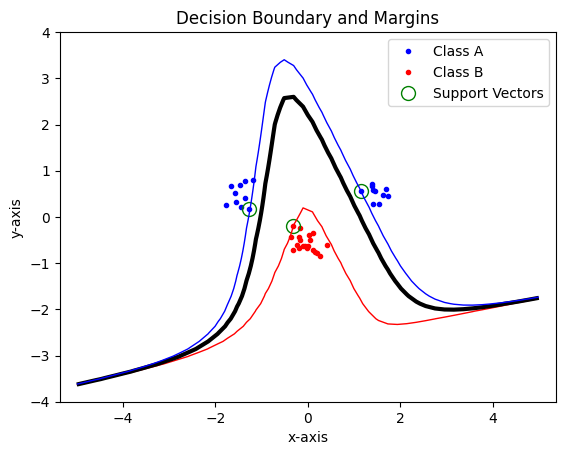

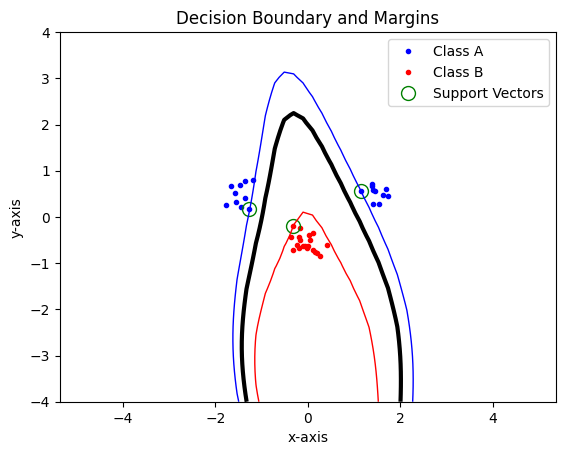

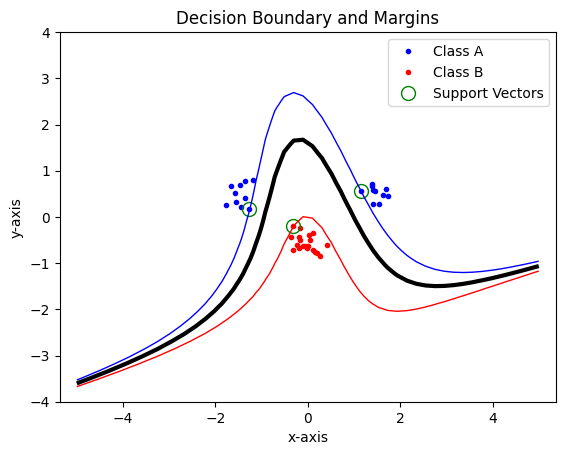

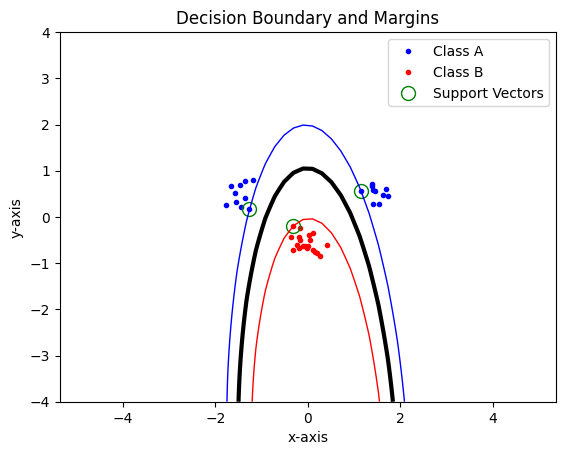

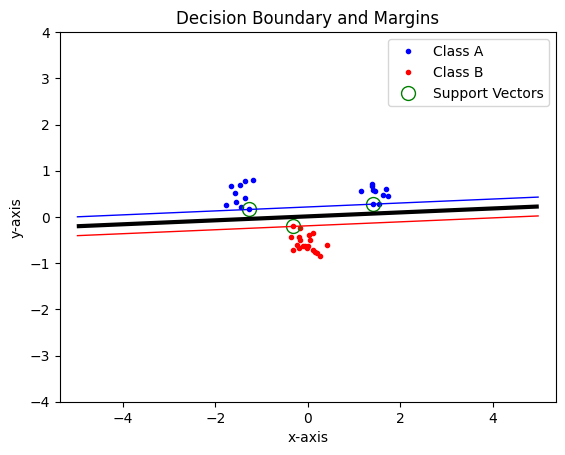

In [6]:
display(Image('src/7_3_poly_5.png'))
display(Image('src/7_3_poly_4.png'))
display(Image('src/7_3_poly_3.png'))
display(Image('src/7_3_poly_2.png'))
display(Image('src/7_3_poly_1.png'))

#### 7.3.2 RBF kernel
  - Low Sigma: complex decision boundary -> overfitting -> high variance & low bias
  - High Sigma: smooth decision boundary -> underfitting -> low variance & high bias

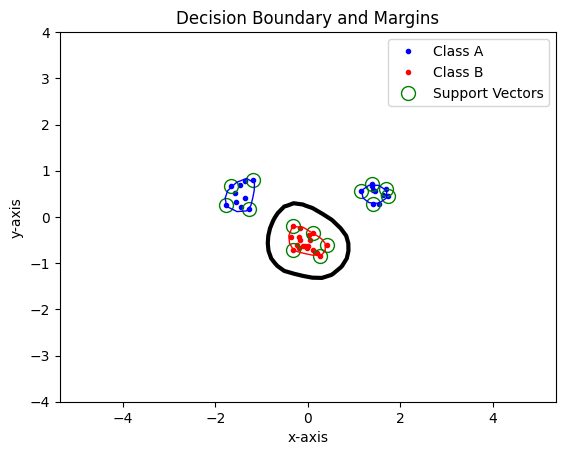

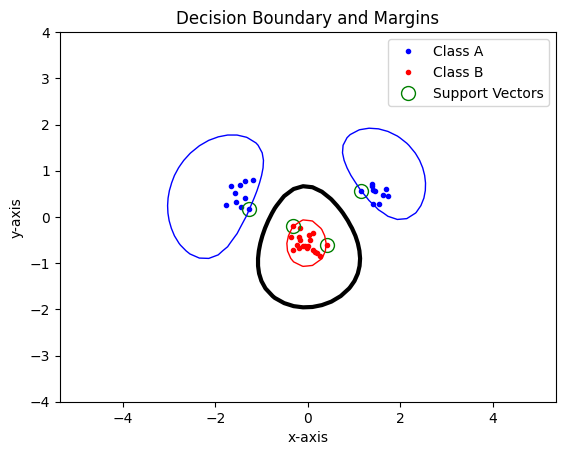

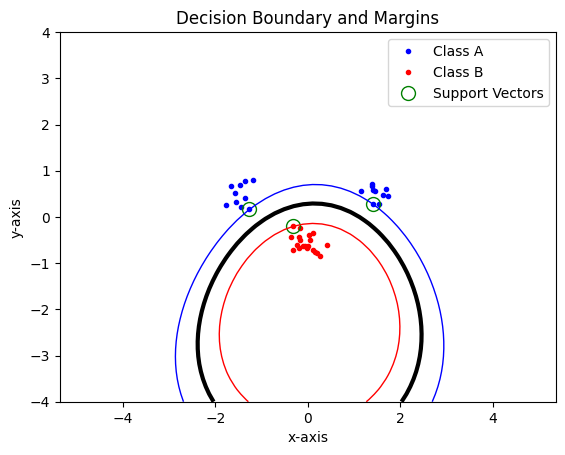

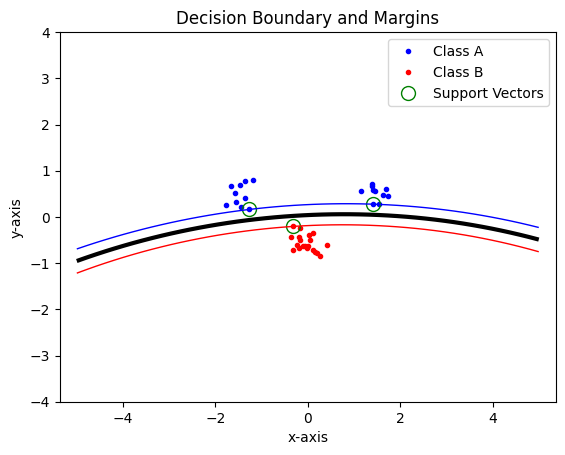

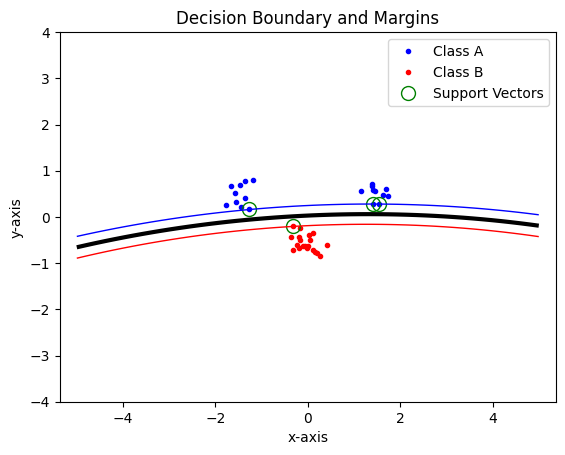

In [7]:
display(Image('src/7_3_rbf_0.3.png'))
display(Image('src/7_3_rbf_1.png'))
display(Image('src/7_3_rbf_3.png'))
display(Image('src/7_3_rbf_10.png'))
display(Image('src/7_3_rbf_13.png'))

### 7.4 
Explore the role of the slack parameter . What happens for very large/small values?
- The slack parameter C in a Support Vector Machine (SVM) controls the tradeoff between **maximizing the margin width** and **minimizing the classification error** on the training data. It is the penalty imposed on misclassified points.
- Small C Values: High Slack - underfitting - Higher bias, lower variance 
  - The SVM prioritizes wide margins over correct classification
  - Many training points are allowed to be misclassified
  - The decision boundary becomes very smooth and simple

- Large C Values: Low Slack - overfitting - Lower bias, higher variance
    - The SVM heavily penalizes any misclassification
    - Tries to classify every training point correctly
    - Creates narrow margins with complex boundaries


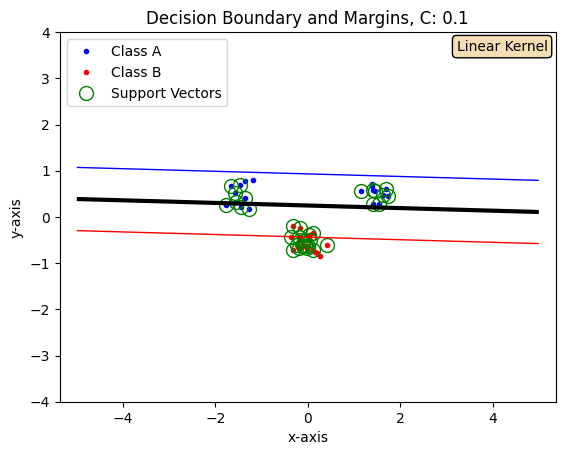

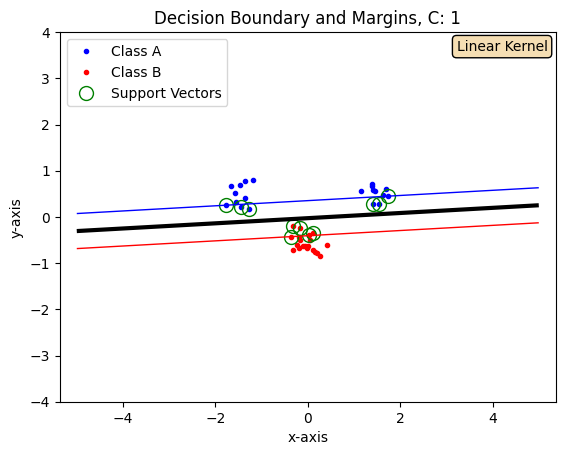

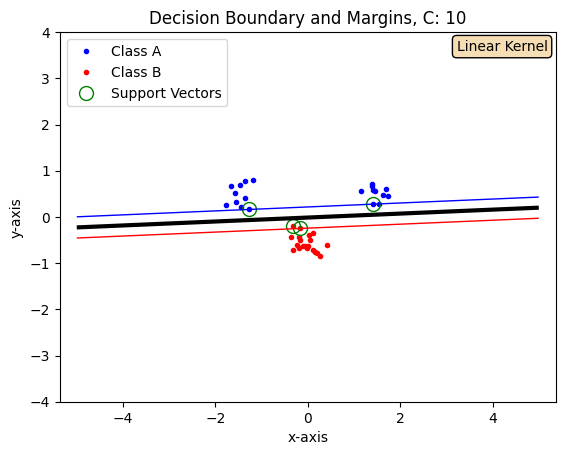

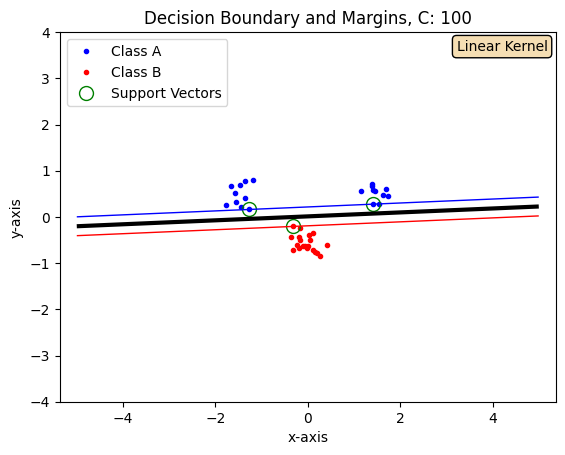

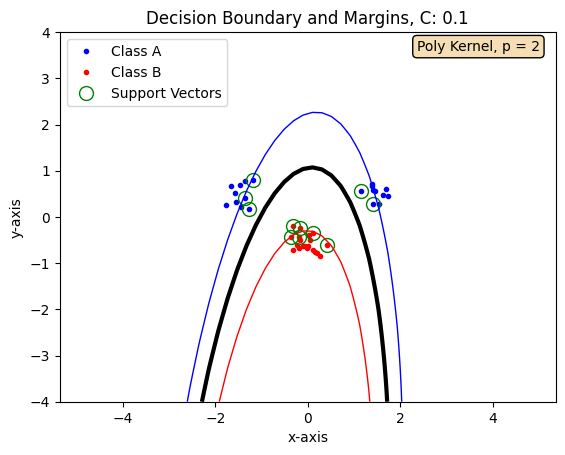

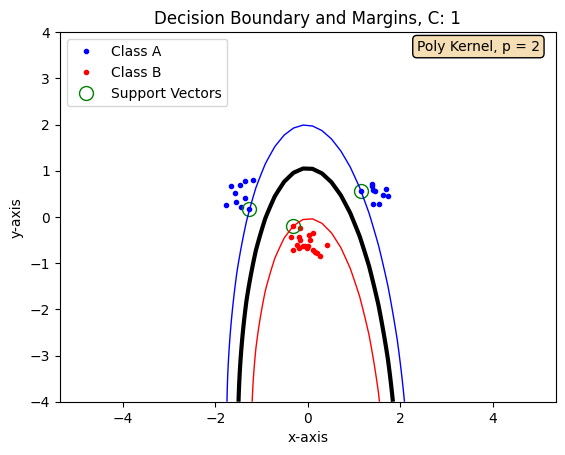

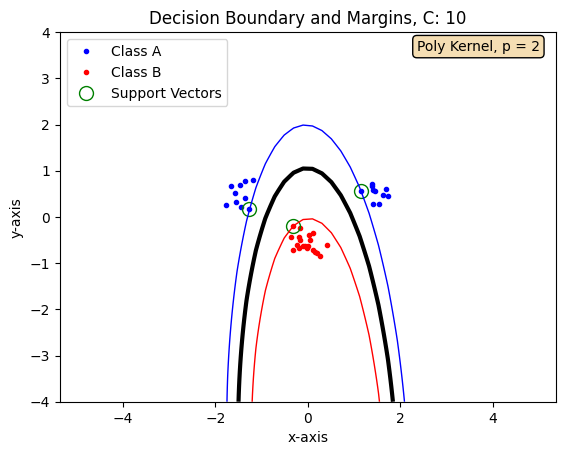

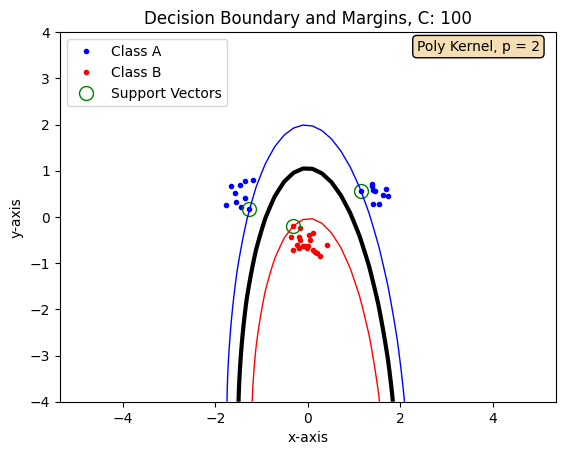

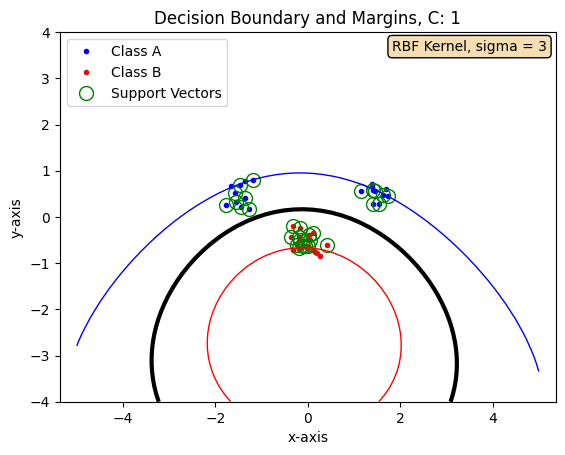

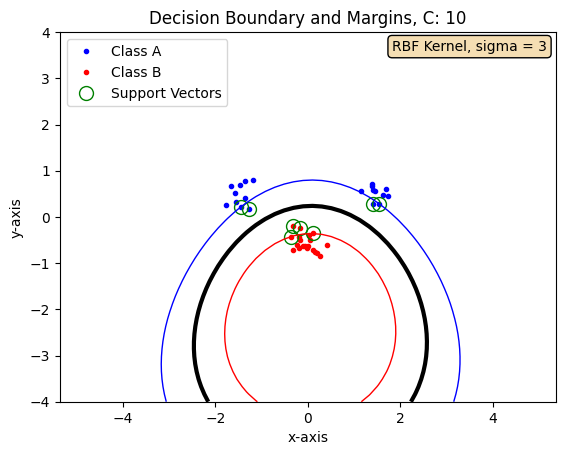

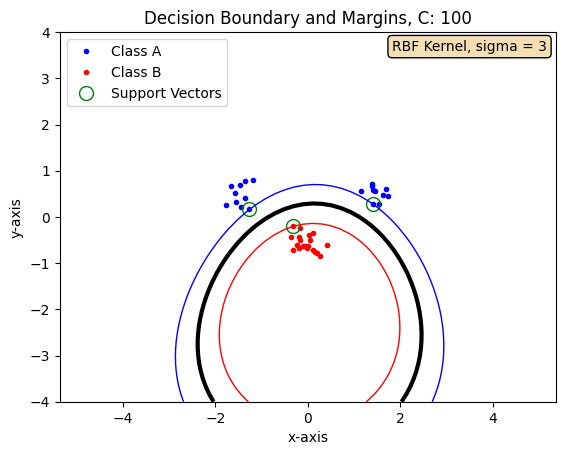

In [9]:
display(Image('src/7_4_linear_C_0.1.png'))
display(Image('src/7_4_linear_C_1.png'))
display(Image('src/7_4_linear_C_10.png'))
display(Image('src/7_4_linear_C_100.png'))

display(Image('src/7_4_poly_2_C_0.1.png'))
display(Image('src/7_4_poly_2_C_1.png'))
display(Image('src/7_4_poly_2_C_10.png'))
display(Image('src/7_4_poly_2_C_100.png'))

display(Image('src/7_4_rbf_3_C_1.png'))
display(Image('src/7_4_rbf_3_C_10.png'))
display(Image('src/7_4_rbf_3_C_100.png'))


### 7.5
Imagine that you are given data that is not easily separable. When should you opt for more slack rather than going for a more complex model (kernel) and vice versa?
- If the data contains noise or measurement errors that create a few outliers in otherwise linearly separable classes, then increasing slack (decreasing C) is the better approach. 
  - These outliers shouldn't determine the entire decision boundary, and allowing the SVM to misclassify a few noisy points will result in a more generalizable model. 
  - A complex kernel in this scenario would try to wrap around every outlier, resulting overfitting.
- In contrast, when the non-separability stems from true structure patterns in the data (such as circular, spiral, or ring relationships), a more complex kernel function is required.
  - Slack **can not** help a linear model correctly classify data that follows a non-linear structure. 
  - In these cases, the RBF or polynomial kernels is essential for capturing the true decision boundary.

